In [45]:
import numpy as np
import matplotlib.pyplot  as plt

from numpy import genfromtxt

try:
    import cPickle as pickle
except ImportError:  # Python 3.x
    import pickle

In [46]:
d={}
t = [x/64.0 for x in range(64*128)]
t_fft = [x/2.0 for x in range(256)]
d["t"] = t
d["tfft"] = t_fft

my_data = genfromtxt('single_dataFFT250_1.csv', delimiter=';')
d["single_fft"] = my_data/1024.0
my_data = genfromtxt('single_dataI2S250_1.csv', delimiter=';')
d["i2s_fft"] = my_data/1024.0
my_data = genfromtxt('single_data250_1.csv', delimiter=';')
d["single_raw"] = my_data/1024.0

with open('lit3rick_i2s.pkl', 'wb') as fp:
    pickle.dump(d, fp, protocol=4)

In [62]:
len(d["single_raw"])/window

256.0

In [73]:
BiVi = []
window = 32
for k in range(int(len(d["single_raw"])/window)):
    start = k*window
    stop = k*window+window-1
    #print(start,stop,start/256)
    BiVi.append(np.max(np.abs(d["single_raw"][start:stop])))

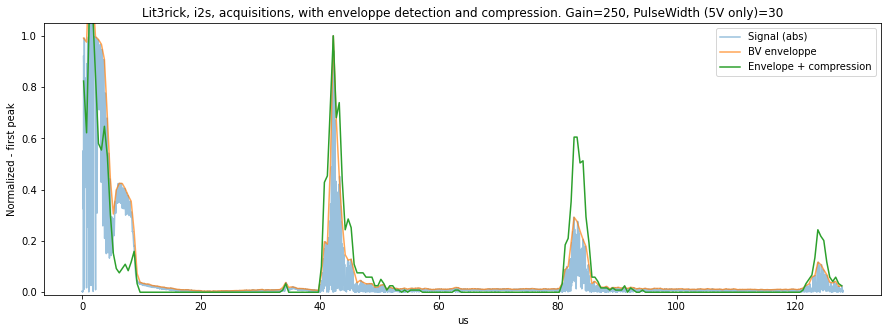

In [88]:
TFFT = [x +0.25 for x in data["tfft"] ]

plt.figure(figsize=(15,5))
plt.plot(d["t"],np.abs(d["single_raw"])/np.max(np.abs(d["single_raw"])[2000:8000]),alpha=0.45,label="Signal (abs)")
plt.plot(TFFT,BiVi/np.max(BiVi[80:100]), label = "BV enveloppe",alpha=0.7)
plt.plot(TFFT,d["single_fft"]/np.max(d["single_fft"][80:100]), label = "Envelope + compression")
plt.title("Lit3rick, i2s, acquisitions, with enveloppe detection and compression. Gain=250, PulseWidth (5V only)=30")
plt.ylim((-0.01,1.05))
#plt.xlim((40,50))
plt.xlabel('us')
plt.legend() 
plt.ylabel('Normalized - first peak')
plt.savefig("lit3_i2s.jpg")

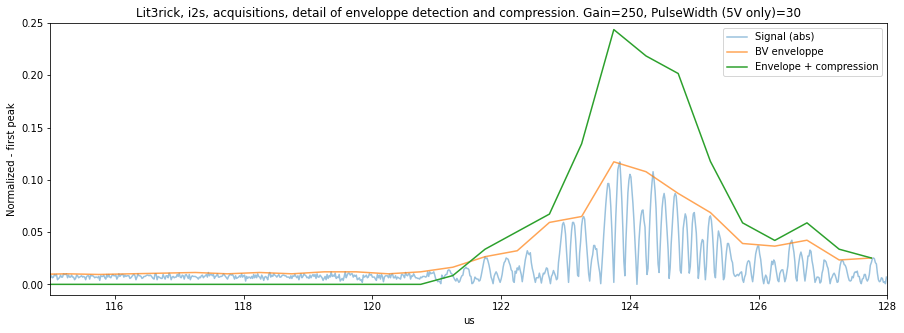

In [89]:
plt.figure(figsize=(15,5))
plt.plot(d["t"],np.abs(d["single_raw"])/np.max(np.abs(d["single_raw"])[2000:8000]),alpha=0.45,label="Signal (abs)")
plt.plot(TFFT,BiVi/np.max(BiVi[80:100]), label = "BV enveloppe",alpha=0.7)
plt.plot(TFFT,d["single_fft"]/np.max(d["single_fft"][80:100]), label = "Envelope + compression")
plt.title("Lit3rick, i2s, acquisitions, detail of enveloppe detection and compression. Gain=250, PulseWidth (5V only)=30")
plt.ylim((-0.01,0.25))
plt.xlim((115,128))
plt.xlabel('us')
plt.ylabel('Normalized - first peak')
plt.legend() 
plt.savefig("lit3_i2s_detailed.jpg")

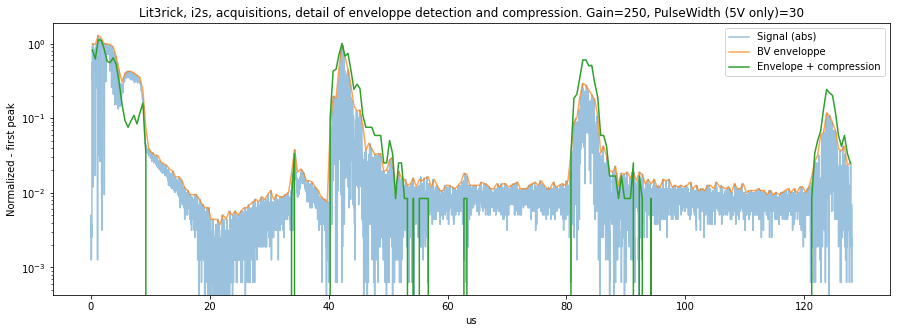

In [90]:
plt.figure(figsize=(15,5))
plt.plot(d["t"],np.abs(d["single_raw"])/np.max(np.abs(d["single_raw"])[2000:8000]),alpha=0.45,label="Signal (abs)")
plt.plot(TFFT,BiVi/np.max(BiVi[80:100]), label = "BV enveloppe",alpha=0.7)
plt.plot(TFFT,d["single_fft"]/np.max(d["single_fft"][80:100]), label = "Envelope + compression")
plt.title("Lit3rick, i2s, acquisitions, detail of enveloppe detection and compression. Gain=250, PulseWidth (5V only)=30")

#plt.xlim((115,128))
plt.xlabel('us')
plt.ylabel('Normalized - first peak')
plt.yscale("log")
plt.legend() 
plt.savefig("lit3_i2s_log.jpg")

In [80]:
with open('lit3rick_i2s.pkl', 'rb') as fp:
    data = pickle.load(fp)

In [44]:
data.keys()

dict_keys(['t', 'tfft', 'single_fft', 'i2s_fft', 'single_raw'])